In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# %pip install ultralytics
import ultralytics
from ultralytics import YOLO

In [3]:
# data = '/kaggle/input/data-yaml3/data.yaml'
data = '/kaggle/input/data-yaml3/data.yaml'

In [4]:
model = YOLO('/kaggle/working/runs/detect/train40/weights/best.pt')

In [5]:
import wandb
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()

my_secret = user_secrets.get_secret("wandb_key") 

wandb.login(key=my_secret)

wandb: Currently logged in as: sumittahiliani24. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
results = model.train(data=data, epochs=200, device=[0,1], imgsz=640, patience=20)# optimizer='AdamW', lr0=0.000001, lrf=0.01, momentum = 0.987, weight_decay=0.0007)

In [ ]:
metrics = model.val()

In [76]:
image = '/kaggle/input/martianlunar-crater-detection-dataset/craters/test/images/015_png.rf.7d5b2091b6339c9480a171a59c52c3b9.jpg'
results = model.predict(source=image, conf=0.25, save=True)


image 1/1 /kaggle/input/martianlunar-crater-detection-dataset/craters/test/images/015_png.rf.7d5b2091b6339c9480a171a59c52c3b9.jpg: 640x640 16 0s, 62.9ms
Speed: 3.3ms preprocess, 62.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


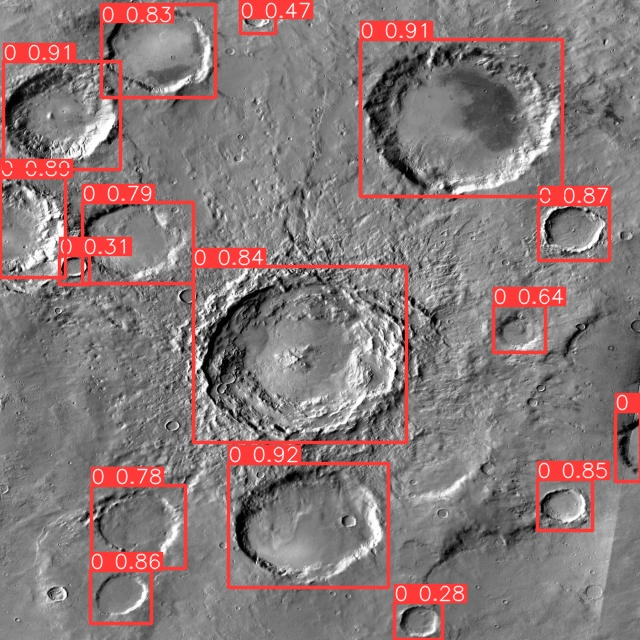

In [77]:
from IPython.display import display, Image
Image(filename='/kaggle/working/runs/detect/predict/015_png.rf.7d5b2091b6339c9480a171a59c52c3b9.jpg', height=640)

In [73]:
# !rm -rv /kaggle/working/runs/detect/train35

In [12]:
# results = model.train(data=data, epochs=200, device=[0,1], imgsz=640, patience=30, hsv_h=0.2, hsv_v=0.7, scale=0.7, shear=30, copy_paste=0.3)

In [13]:
# path = '/kaggle/working/runs/detect/train25'
# !rm -rf path

In [ ]:
# results = model.train(data=data, epochs=200, device=[0,1], imgsz=640, patience=30, hsv_h=0.2, hsv_v=0.7, scale=0.7, shear=60, mosaic=0.5,)